In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


In [6]:
data = pd.read_csv(r"C:\Users\Trilokesh\Downloads\Downloads\Datas\MJP_DATA.csv")

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
data.shape

(1599, 12)

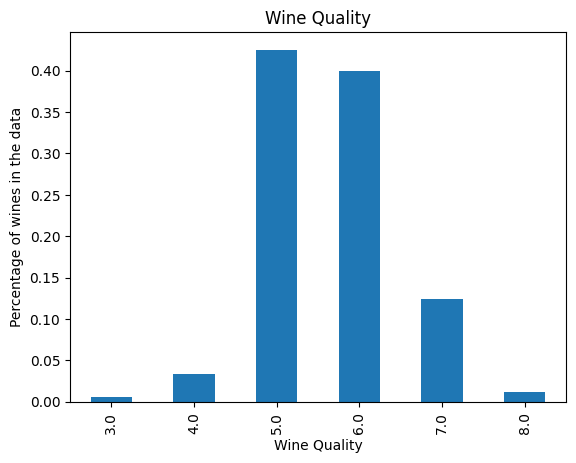

In [9]:
(data['quality'].value_counts() / len(data)).sort_index().plot.bar()

# plot
plt.title('Wine Quality')
plt.ylabel('Percentage of wines in the data')
plt.xlabel('Wine Quality')
plt.show()

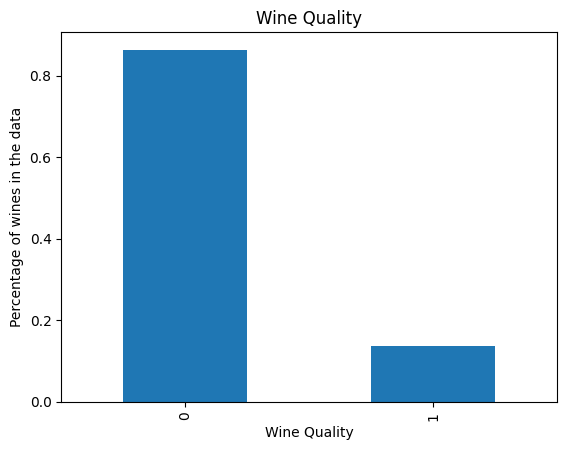

In [10]:
data['quality'] = np.where(data['quality'] <= 6, 0, 1)

(data['quality'].value_counts() / len(data)).plot.bar()

plt.title('Wine Quality')
plt.ylabel('Percentage of wines in the data')
plt.xlabel('Wine Quality')
plt.show()

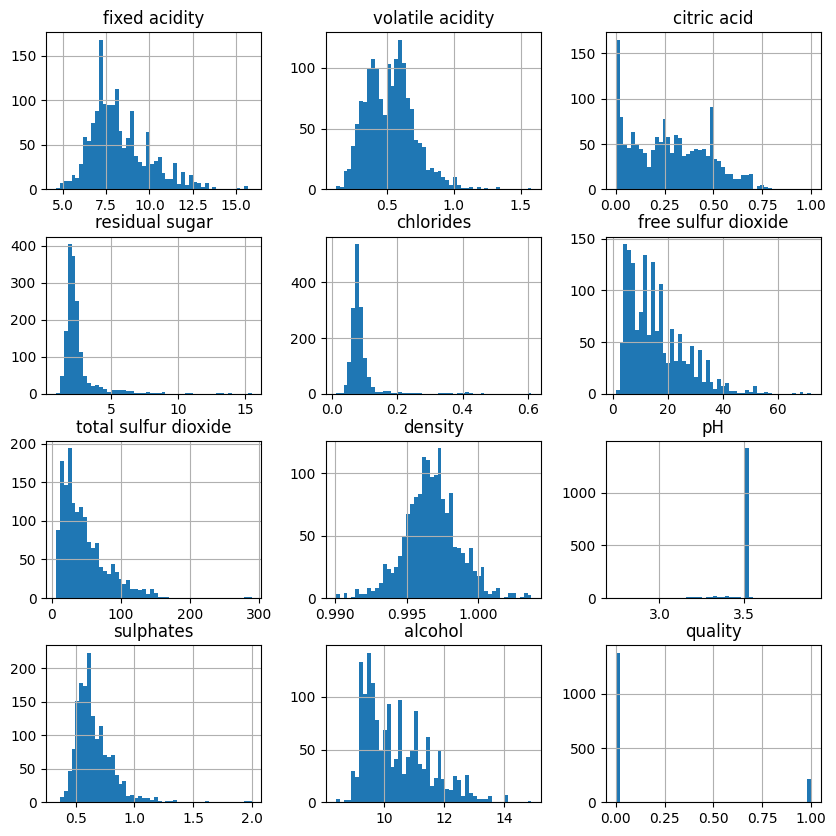

In [11]:
data.hist(bins=50, figsize=(10,10))

plt.show()

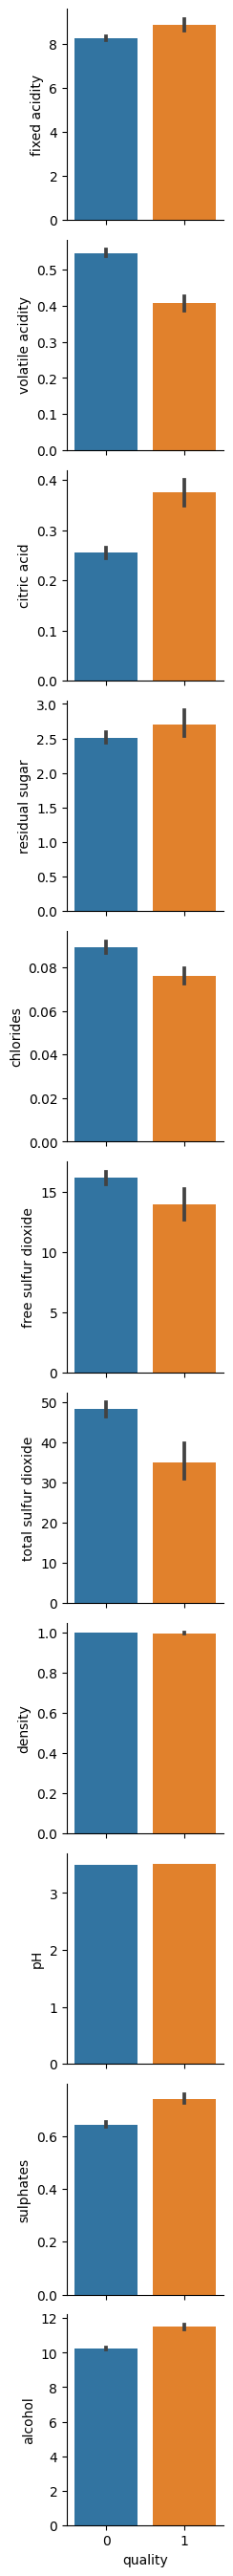

In [12]:
g = sns.PairGrid(data, x_vars=["quality"], y_vars=data.columns[0:-1])
g.map(sns.barplot)
plt.show()

C:\Users\Trilokesh\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Trilokesh\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


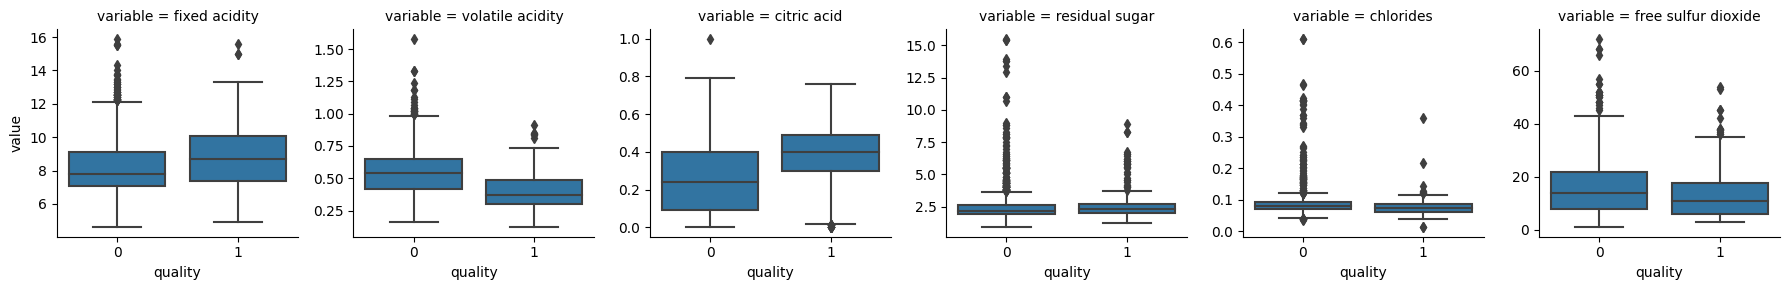

In [13]:
df = data.melt(id_vars=['quality'])

# capture variables
cols = df.variable.unique()

# plot first 6 columns
g = sns.axisgrid.FacetGrid(df[df.variable.isin(cols[0:6])], col='variable', sharey=False)
g.map(sns.boxplot, 'quality','value')
plt.show()

C:\Users\Trilokesh\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Trilokesh\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


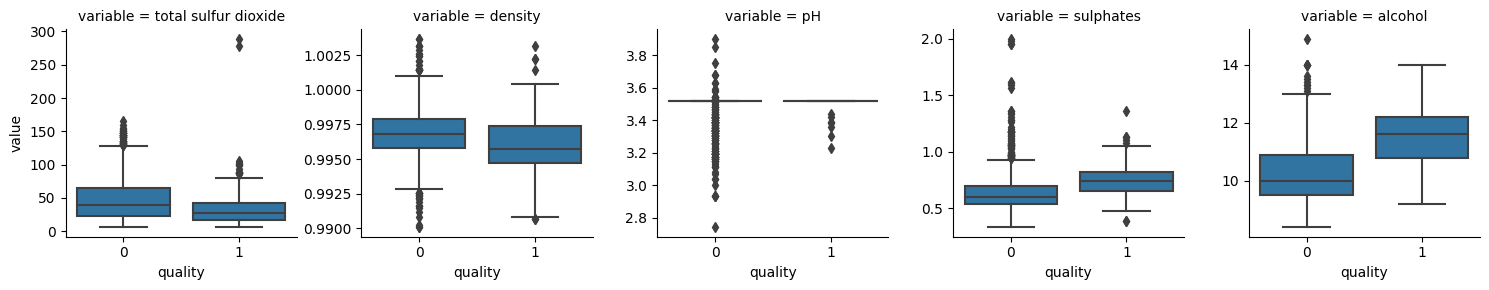

In [14]:
g = sns.axisgrid.FacetGrid(df[df.variable.isin(cols[6:])], col='variable', sharey=False)
g.map(sns.boxplot, 'quality','value')
plt.show()

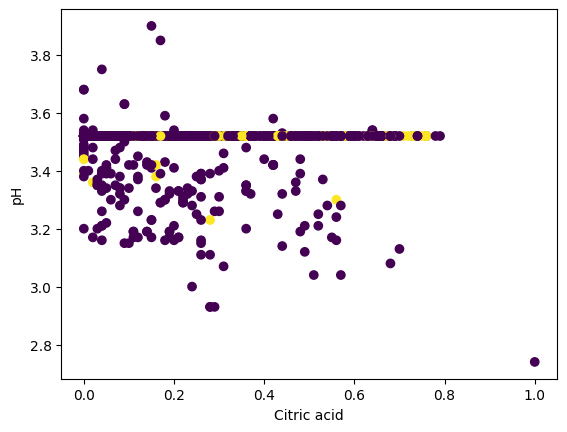

In [15]:
plt.scatter(data['citric acid'], data['pH'], c=data['quality'])
plt.xlabel('Citric acid')
plt.ylabel('pH')
plt.show()

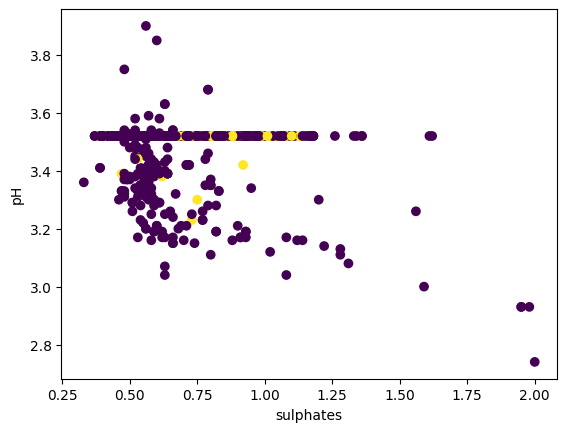

In [16]:
plt.scatter(data['sulphates'], data['pH'], c=data['quality'])
plt.xlabel('sulphates')
plt.ylabel('pH')
plt.show()

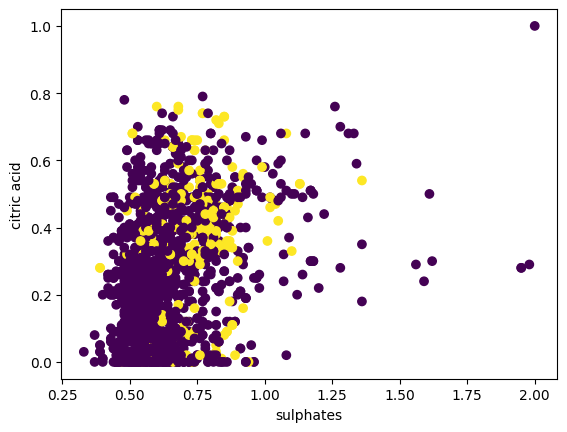

In [17]:
plt.scatter(data['sulphates'], data['citric acid'], c=data['quality'])
plt.xlabel('sulphates')
plt.ylabel('citric acid')
plt.show()

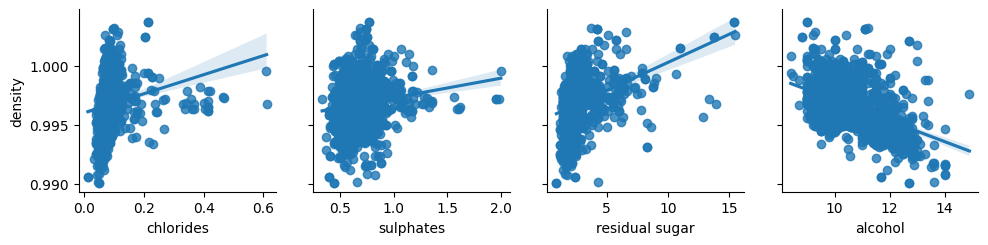

In [18]:
g = sns.PairGrid(data, y_vars=["density"], x_vars=['chlorides','sulphates', 'residual sugar', 'alcohol'])
g.map(sns.regplot)
plt.show()